Mean temperature and moisture of the marine boundary layer, up to 2 km

MLB (GFS)
* https://registry.opendata.aws/noaa-gfs-bdp-pds/
* Resources on AWS -> Explore -> Browse Bucket
* Search -> 20230219
* gfs.20230219/
* 00/
* atmos/
* gfs.t00z.pgrb2.0p25.f000
    * no forcast (t00z)
    * 0.25 resolution
    * Inventory of file: https://www.nco.ncep.noaa.gov/pmb/products/gfs/gfs.t00z.pgrb2.0p25.anl.shtml

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
fname = "/Volumes/Turner2/FalseLowClouds/Analysis/Model/gfs.t00z.pgrb2.0p25.f000"

ds = xr.open_dataset(fname, engine="cfgrib",backend_kwargs={'filter_by_keys': {'typeOfLevel':'isobaricInhPa'}})
ds

skipping variable: paramId==228164 shortName='tcc'
Traceback (most recent call last):
  File "/Users/jturner/miniconda3/envs/FLC/lib/python3.10/site-packages/cfgrib/dataset.py", line 676, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Users/jturner/miniconda3/envs/FLC/lib/python3.10/site-packages/cfgrib/dataset.py", line 607, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,
        200.,  150.,  100.,   70.,   50.,   40.,   30.,   20.,   15.,
         10.,    7.,    5.,    3.,    2.,    1.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,


<xarray.Dataset>
Dimensions:        (isobaricInhPa: 33, latitude: 721, longitude: 1440)
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 975.0 950.0 ... 3.0 2.0 1.0
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] ...
Data variables:
    gh             (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    r              (isobaricInhPa, latitude, longitude) float32 ...
    q              (isobaricInhPa, latitude, longitude) float32 ...
    w              (isobaricInhPa, latitude, longitude) float32 ...
    wz             (isobaricInhPa, latitude, longitude) float32 ...
    u              (isobaricInhPa, latitude, longitude) float32 ...
    v              (isobaricInhPa, latitude, longitude) float32 ...
    absv           (isobaricInhPa, latitude, longitude) float32 ...
    o3mr           (isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-04-10T11:33 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
min_lon = -109 + 360
min_lat = 24
max_lon = -81 + 360
max_lat = 10.4

cropped_ds = ds.sel(latitude=slice(min_lat,max_lat), longitude=slice(min_lon,max_lon))

#---MBL
min_press = 850 #mb
max_press = 1000 #mb

cropped_ds = cropped_ds.sel(isobaricInhPa=slice(max_press,min_press))

#---mean across MBL
cropped_ds = cropped_ds.mean(dim='isobaricInhPa')

cropped_ds =  cropped_ds.squeeze()
cropped_ds

<xarray.Dataset>
Dimensions:     (latitude: 55, longitude: 113)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
  * latitude    (latitude) float64 24.0 23.75 23.5 23.25 ... 11.0 10.75 10.5
  * longitude   (longitude) float64 251.0 251.2 251.5 ... 278.5 278.8 279.0
    valid_time  datetime64[ns] ...
Data variables:
    gh          (latitude, longitude) float32 720.4 720.0 720.1 ... 718.1 717.2
    t           (latitude, longitude) float32 292.5 292.8 293.1 ... 293.4 293.3
    r           (latitude, longitude) float32 20.57 19.83 18.8 ... 83.65 84.9
    q           (latitude, longitude) float32 0.00286 0.002733 ... 0.01338
    w           (latitude, longitude) float32 0.01084 0.04834 ... 0.05734 0.1328
    wz          (latitude, longitude) float32 -0.0008546 -0.004571 ... -0.009621
    u           (latitude, longitude) float32 -0.1685 -0.2785 ... -7.135 -7.164
    v           (latitude, longitude) float32 -0.4944 -0.8061 ... -6.591 -7.004
    absv        (latitude, longitude) float32 4.646e-05 5.396e-05 ... 2.096e-05
    o3mr        (latitude, longitude) float32 6.424e-08 6.455e-08 ... 5.693e-08

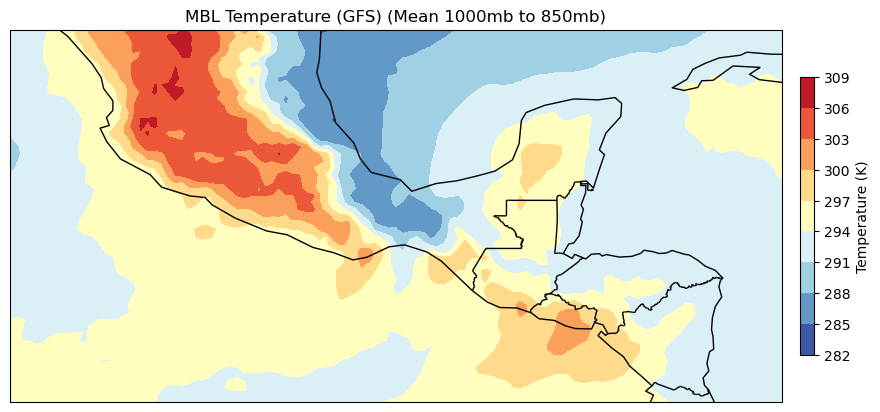

In [4]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.RdYlBu_r

ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS)
c=ax.contourf(cropped_ds.longitude, cropped_ds.latitude, cropped_ds.t, cmap=cmap)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('MBL Temperature (GFS) (Mean '+str(max_press)+'mb to '+str(min_press)+'mb)')
clb.set_label('Temperature (K)')

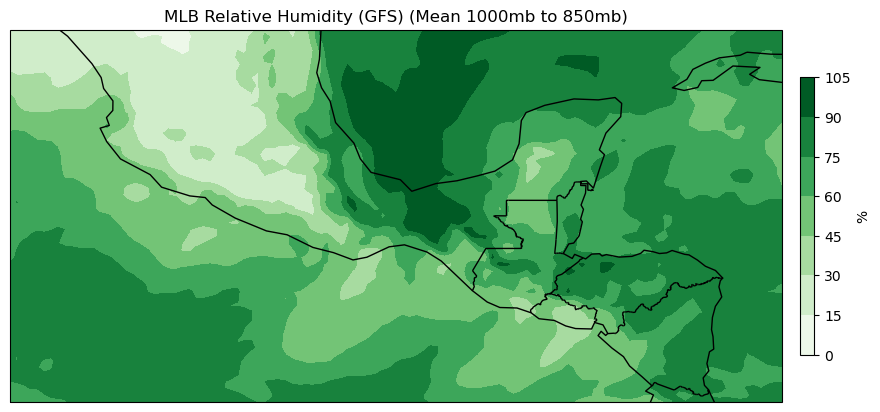

In [5]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.Greens

ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS)
c=ax.contourf(cropped_ds.longitude, cropped_ds.latitude, cropped_ds.r, cmap=cmap)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('MLB Relative Humidity (GFS) (Mean '+str(max_press)+'mb to '+str(min_press)+'mb)')
clb.set_label('%')

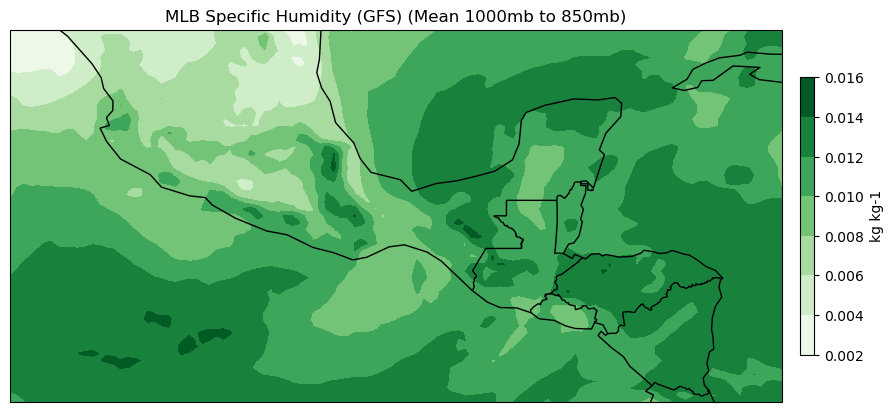

In [7]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.Greens

ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS)
c=ax.contourf(cropped_ds.longitude, cropped_ds.latitude, cropped_ds.q, cmap=cmap)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('MLB Specific Humidity (GFS) (Mean '+str(max_press)+'mb to '+str(min_press)+'mb)')
clb.set_label('kg kg-1')